# Importação das bibliotecas

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [67]:
#Importação do dataset
df_score = pd.read_csv("score.txt", sep=" ", header=0)

# Detalher sobre o dataset
#### Dados gerados a partir da execução do código de split or steal com alguns agentes aprendendo a jogar por meio de aprendizagem por reforço 

In [68]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   i             16500 non-null  int64  
 1   name          16500 non-null  object 
 2   total_amount  16500 non-null  float64
 3   reward        16500 non-null  float64
 4   type          16500 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 644.7+ KB


In [69]:
df_score.describe()

,i,total_amount,reward
count,16500.000000,16500.000000,16500.000000
mean,249.500000,92522.864790,0.158109
std,144.341653,49204.266791,0.335387
min,0.000000,159.591611,-0.046000
25%,124.750000,58085.996587,0.000000
50%,249.500000,87976.597123,0.000000
75%,374.250000,117301.202102,0.083333
max,499.000000,240043.605358,1.500000


In [70]:
df_score.head(5)

,i,name,total_amount,reward,type
0,0,Karmine,134711.456489,0.000000,Allgame
1,0,GP_agent_1,178915.717322,0.662333,Allgame
2,0,Pretender,200623.966334,0.000000,Allgame
3,0,Randy,175985.255171,0.000000,Allgame
4,0,Splitter,113254.808080,0.000000,Allgame


In [71]:
df_GP_1=df_score.where(df_score["name"] == "GP_agent_1").dropna().reset_index(drop=True) # DF contendo apenas o agente 01

# Gráficos do Agente 1

/tmp/ipykernel_28160/2760294499.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', ci=None)


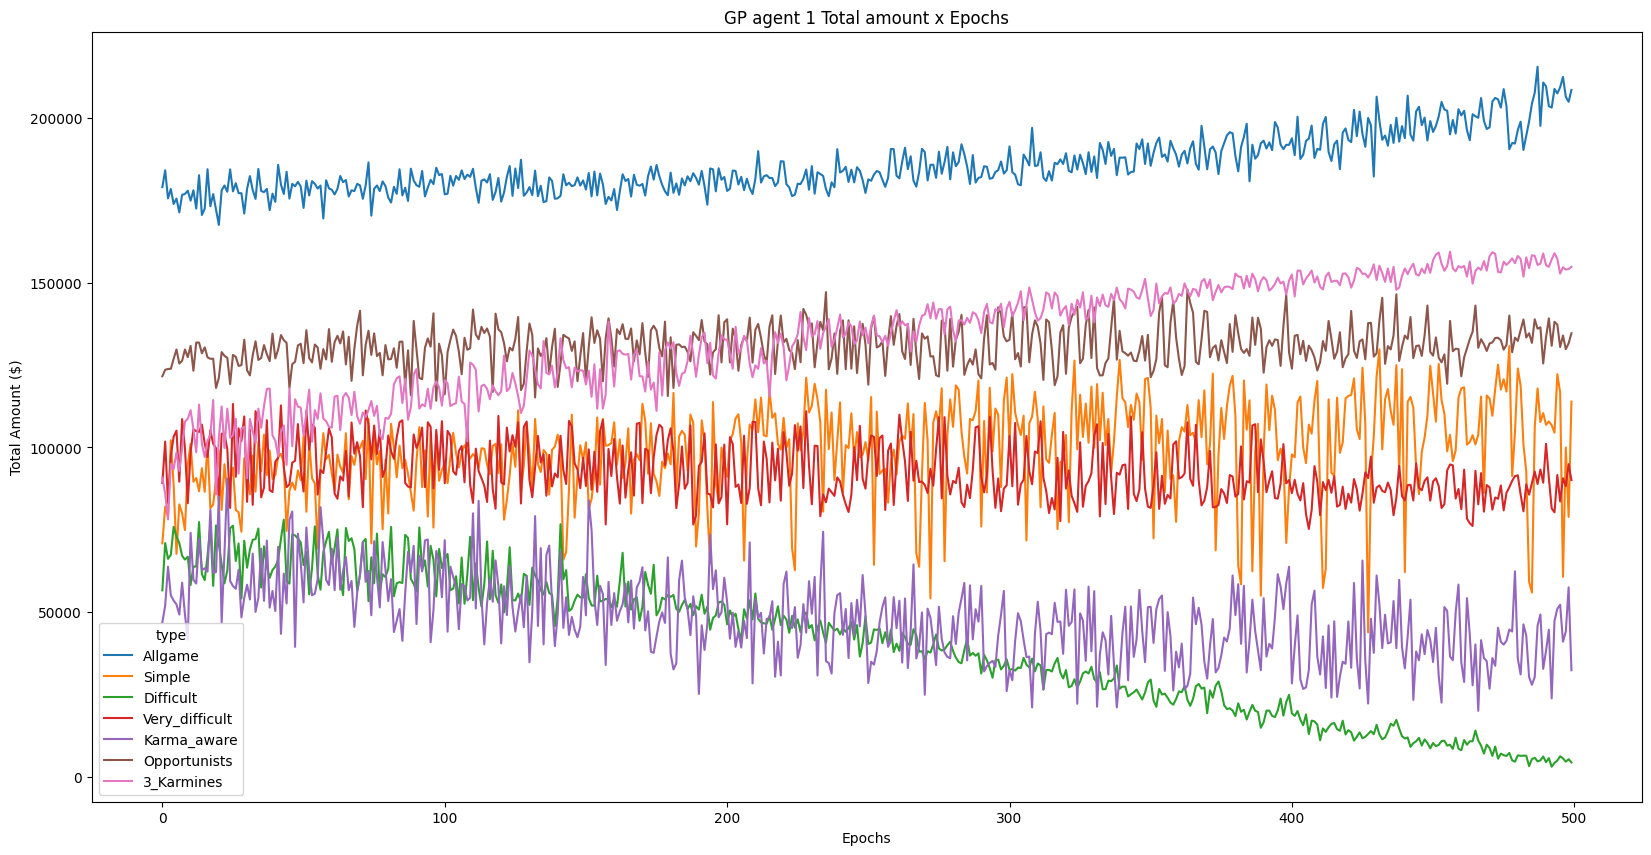

In [72]:
# pivot the data into the correct shape
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', ci=None)
plt.title("GP agent 1 Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()


/tmp/ipykernel_28160/3590481346.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',ci=None)


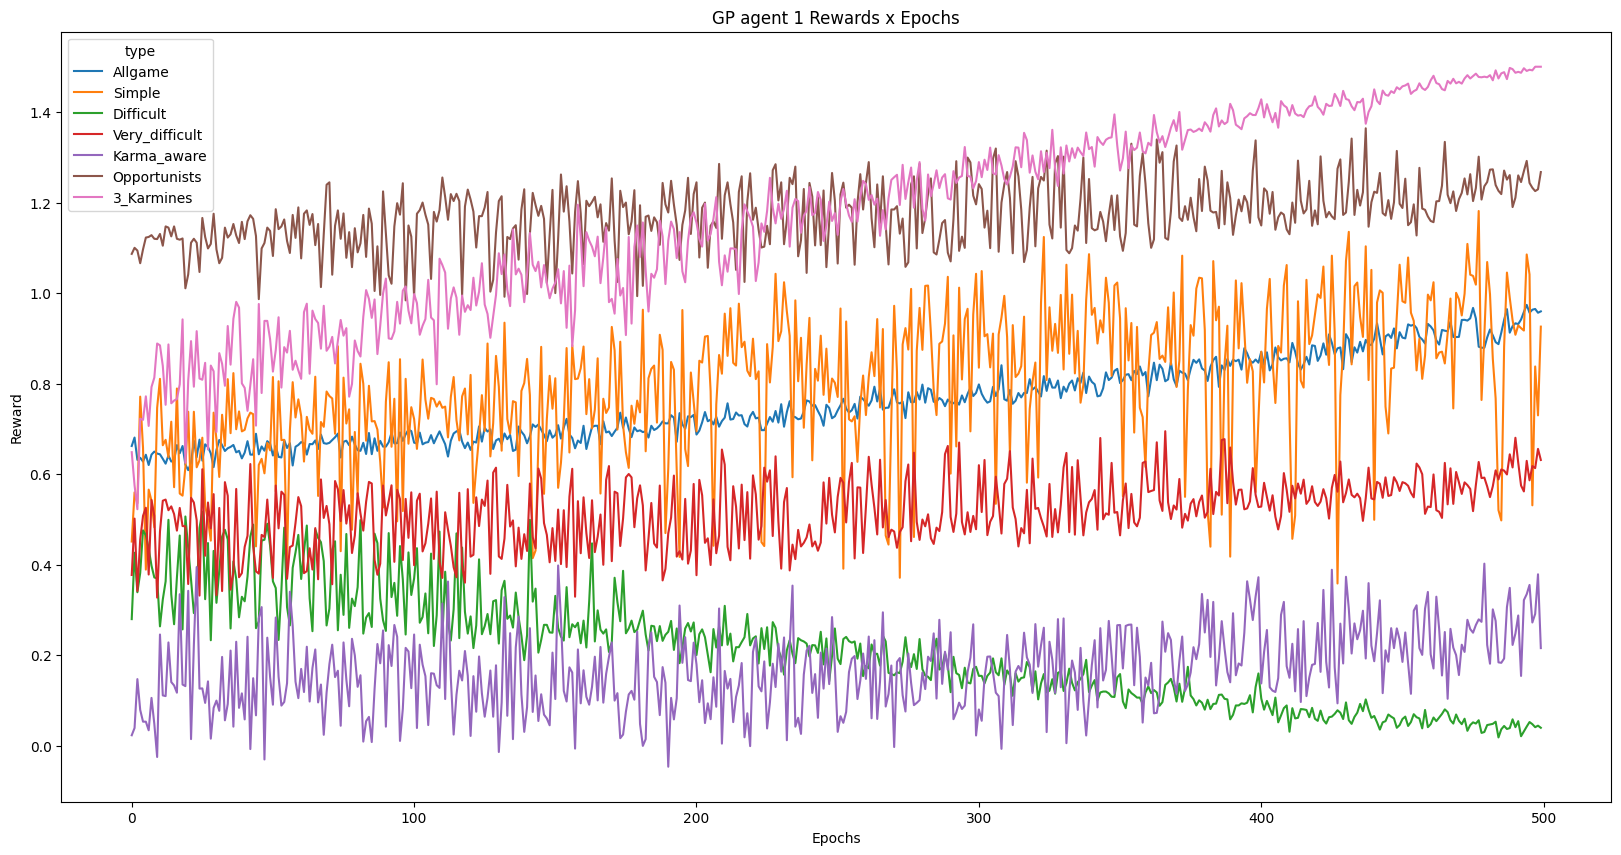

In [73]:
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',ci=None)
plt.title("GP agent 1 Rewards x Epochs")
plt.ylabel("Reward")
plt.xlabel("Epochs")
plt.show()

# Gráficos de todos o agentes

In [74]:
#Criação de datasets filtrados por tipo de jogo
df_Allgame=df_score.where(df_score["type"] == "Allgame").dropna().reset_index(drop=True)
df_Simple=df_score.where(df_score["type"] == "Simple").dropna().reset_index(drop=True)
df_Difficult=df_score.where(df_score["type"] == "Difficult").dropna().reset_index(drop=True)
df_Very_difficult=df_score.where(df_score["type"] == "Very_difficult").dropna().reset_index(drop=True)
df_Karma_aware=df_score.where(df_score["type"] == "Karma_aware").dropna().reset_index(drop=True)
df_Opportunists=df_score.where(df_score["type"] == "Opportunists").dropna().reset_index(drop=True)
df_3_Karmines=df_score.where(df_score["type"] == "3_Karmines").dropna().reset_index(drop=True)

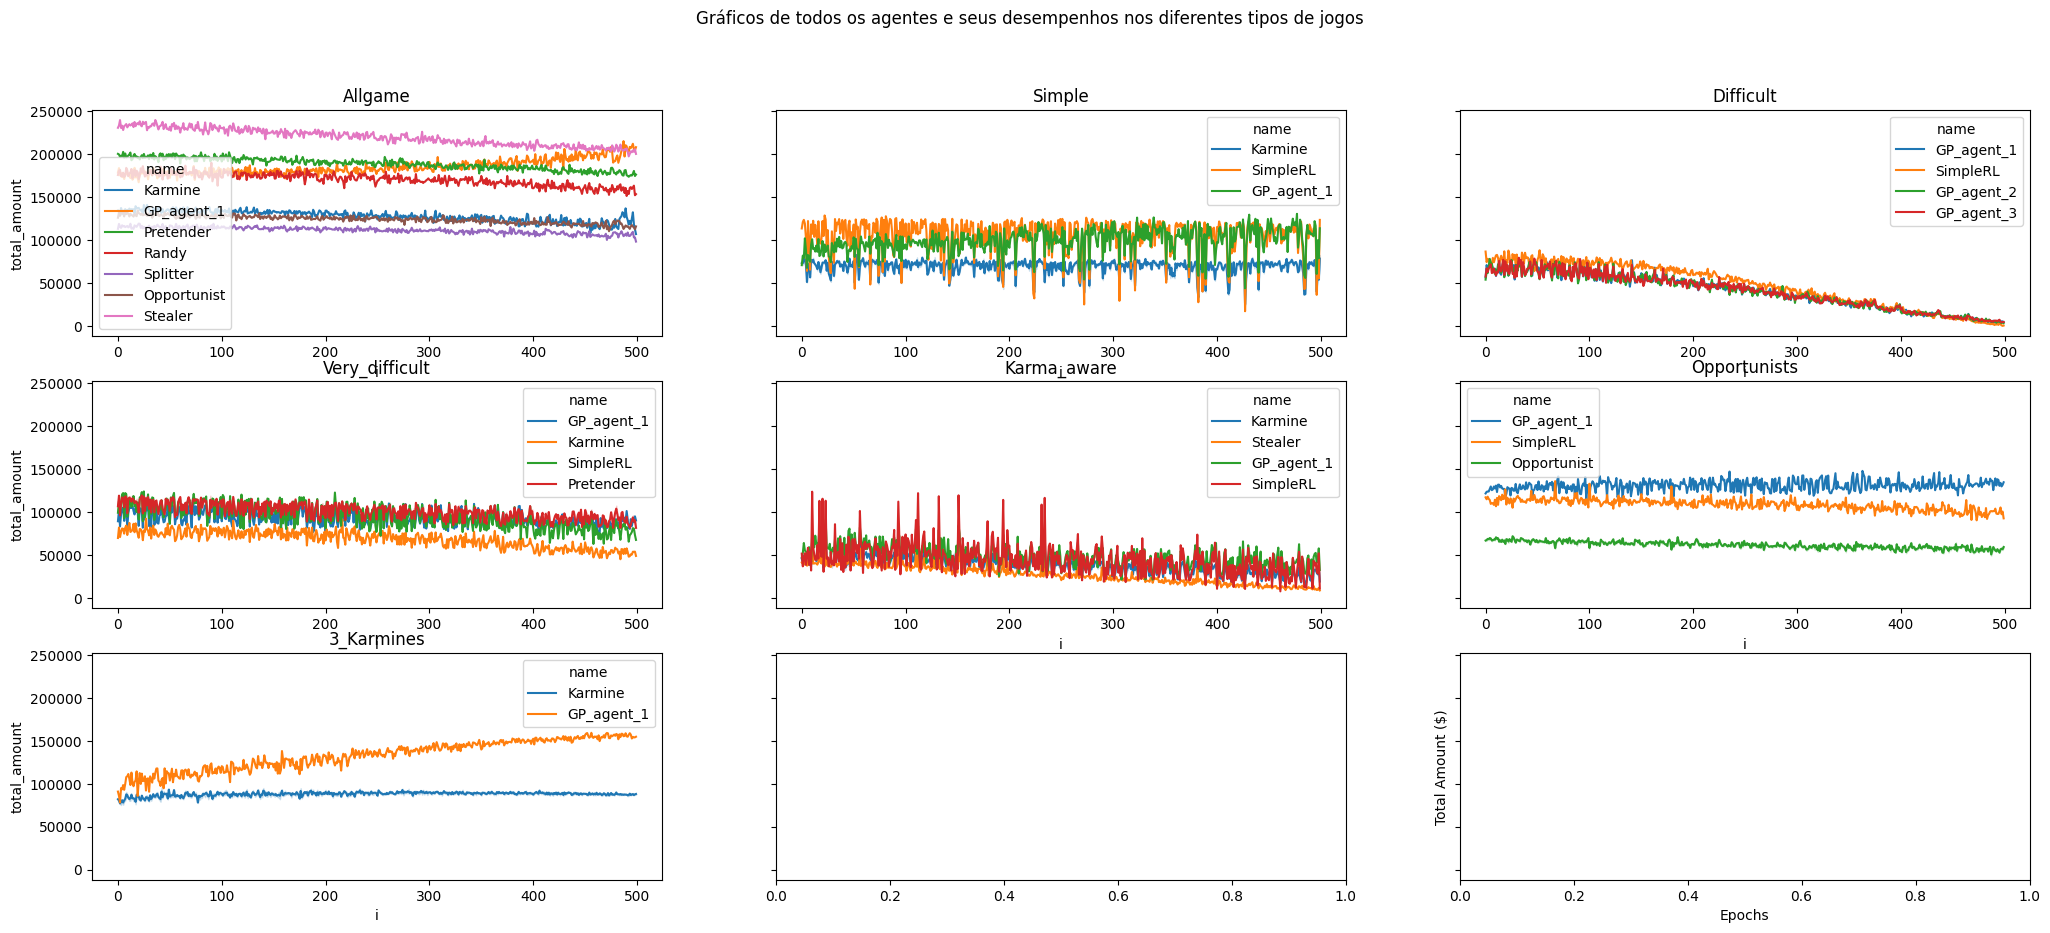

In [75]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Gráficos de todos os agentes e seus desempenhos nos diferentes tipos de jogos')

sn.lineplot(ax=axes[0, 0],data = df_Allgame, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 1],data = df_Simple, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 2],data = df_Difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 0],data = df_Very_difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 1],data = df_Karma_aware, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 2],data = df_Opportunists, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[2, 0],data = df_3_Karmines, x = "i", y = 'total_amount', hue = 'name')
axes[0][0].set_title("Allgame")
axes[0][1].set_title("Simple")
axes[0][2].set_title("Difficult")
axes[1][0].set_title("Very_difficult")
axes[1][1].set_title("Karma_aware")
axes[1][2].set_title("Opportunists")
axes[2][0].set_title("3_Karmines")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()